In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [492]:
data = pd.read_csv('messy_data.csv', na_values="")
data

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,IF,D,Ideal,5.1,5.15,3.2,61.5,,3000
1,0.70,vvs2,E,premium,5.7,,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,,62.3,56,700
3,1.20,if,d,ideal,,6.82,4.2,61.7,58,10000
4,0.90,I1,J,Fair,6,,3.7,61.7,,2400
...,...,...,...,...,...,...,...,...,...,...
195,0.45,si1,F,very good,4.9,4.89,,62.4,59,2300
196,1.25,VVS2,H,Good,6.9,,4.27,,55,10400
197,0.55,i1,I,Premium,5.3,,3.28,62.3,57,150000
198,0.85,Si2,E,fair,6.1,6.13,3.78,,58,6300


In [493]:
data = data.rename(columns=lambda x: x.strip()) #usunięcie spacji przed nazwami kolumn

In [494]:
data = data.replace(" ", np.nan) #zamiana pustych kolumn na wartości null  w celu dalszego uzupełnienia

In [495]:
data

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,IF,D,Ideal,5.1,5.15,3.2,61.5,NaN,3000
1,0.70,vvs2,E,premium,5.7,NaN,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,NaN,62.3,56,700
3,1.20,if,d,ideal,NaN,6.82,4.2,61.7,58,10000
4,0.90,I1,J,Fair,6,NaN,3.7,61.7,NaN,2400
...,...,...,...,...,...,...,...,...,...,...
195,0.45,si1,F,very good,4.9,4.89,NaN,62.4,59,2300
196,1.25,VVS2,H,Good,6.9,NaN,4.27,NaN,55,10400
197,0.55,i1,I,Premium,5.3,NaN,3.28,62.3,57,150000
198,0.85,Si2,E,fair,6.1,6.13,3.78,NaN,58,6300


#### Sprawdzanie typów danych

In [496]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        150 non-null    float64
 1   clarity      200 non-null    object 
 2   color        200 non-null    object 
 3   cut          200 non-null    object 
 4   x dimension  197 non-null    object 
 5   y dimension  136 non-null    object 
 6   z dimension  152 non-null    object 
 7   depth        133 non-null    object 
 8   table        167 non-null    object 
 9   price        196 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.8+ KB


In [497]:
numeric = ['x dimension', 'y dimension', 'z dimension', 'depth', 'table', 'price']

for n in numeric:
    data[n] = data[n].astype('float64')


In [498]:
string = ['clarity', 'color', 'cut']

for s in string:
    data[s]=data[s].astype('string')

In [499]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        150 non-null    float64
 1   clarity      200 non-null    string 
 2   color        200 non-null    string 
 3   cut          200 non-null    string 
 4   x dimension  197 non-null    float64
 5   y dimension  136 non-null    float64
 6   z dimension  152 non-null    float64
 7   depth        133 non-null    float64
 8   table        167 non-null    float64
 9   price        196 non-null    float64
dtypes: float64(7), string(3)
memory usage: 15.8 KB


In [500]:
data.describe()

,carat,x dimension,y dimension,z dimension,depth,table,price
count,150.000000,197.000000,136.000000,152.000000,133.000000,167.000000,196.000000
mean,0.799000,5.885787,5.829706,3.694671,62.316541,56.910180,11410.714286
std,0.321827,0.770172,0.767402,0.462431,0.326408,1.421972,40072.669086
min,0.200000,3.900000,3.890000,2.410000,61.200000,54.000000,500.000000
25%,0.512500,5.300000,5.290000,3.350000,62.100000,56.000000,2600.000000
50%,0.750000,5.900000,5.850000,3.715000,62.300000,57.000000,4350.000000
75%,1.050000,6.500000,6.512500,4.082500,62.600000,58.000000,7900.000000
max,1.600000,7.300000,7.280000,4.500000,63.000000,60.000000,350000.000000


### Sprawdzanie istnienia duplikatów

In [501]:
data.duplicated().sum()

0

In [502]:
data.columns

Index(['carat', 'clarity', 'color', 'cut', 'x dimension', 'y dimension',
       'z dimension', 'depth', 'table', 'price'],
      dtype='object')

In [503]:
for column in data.columns:
     print(data.value_counts(column))

#wnioski todo: wszystkie kategorialne na male litery

carat
0.50    13
0.55    12
0.40    10
0.45     9
0.65     8
0.70     8
0.75     8
1.05     8
0.60     7
1.30     7
0.85     7
0.90     7
0.95     6
1.20     6
1.15     5
1.40     5
1.25     4
0.80     4
1.10     4
0.35     4
1.00     2
1.35     2
1.50     1
0.20     1
0.30     1
1.60     1
Name: count, dtype: int64
clarity
 i1      26
 VVS1    23
 si2     23
 IF      20
 VVS2    19
 si1     18
 vvs2    18
 Si2     16
 Si1     12
 vvs1    11
 I1       5
 SI2      5
 if       3
 Vvs1     1
Name: count, dtype: int64
color
 G            36
 I            33
 H            30
 F            24
 D            13
 E            13
 e            12
 d             9
 colorless     6
 f             6
 j             6
 g             4
 h             4
 Colorless     2
 J             2
Name: count, dtype: int64
cut
 Premium      34
 Good         30
 fair         24
 Ideal        23
 good         21
 very good    19
 Fair         12
 Very good    10
 Very Good     9
 ideal         9
 premium       7
 v

In [504]:
for s in string:
    data[s] = data[s].astype('string').str.lower()


In [505]:
data.isna().sum()

carat          50
clarity         0
color           0
cut             0
x dimension     3
y dimension    64
z dimension    48
depth          67
table          33
price           4
dtype: int64

In [506]:
data

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,if,d,ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.70,vvs2,e,premium,5.7,NaN,3.52,62.0,59.0,4500.0
2,NaN,si2,h,good,4.3,4.31,NaN,62.3,56.0,700.0
3,1.20,if,d,ideal,NaN,6.82,4.20,61.7,58.0,10000.0
4,0.90,i1,j,fair,6.0,NaN,3.70,61.7,NaN,2400.0
...,...,...,...,...,...,...,...,...,...,...
195,0.45,si1,f,very good,4.9,4.89,NaN,62.4,59.0,2300.0
196,1.25,vvs2,h,good,6.9,NaN,4.27,NaN,55.0,10400.0
197,0.55,i1,i,premium,5.3,NaN,3.28,62.3,57.0,150000.0
198,0.85,si2,e,fair,6.1,6.13,3.78,NaN,58.0,6300.0


In [507]:
data.isnull().sum(axis=1).max()

4

In [508]:
data[data.isnull().sum(axis=1)==4]

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
8,NaN,si2,i,good,4.3,4.32,NaN,62.3,NaN,NaN


In [509]:
data[data.isnull().sum(axis=1)==3]

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
44,NaN,si1,e,fair,6.0,6.01,NaN,NaN,54.0,2700.0
89,NaN,si2,e,very good,5.8,5.81,NaN,NaN,55.0,3000.0
95,NaN,vvs2,d,good,6.4,6.42,3.97,NaN,NaN,8000.0
107,NaN,vvs2,d,fair,6.4,NaN,3.97,62.4,NaN,7900.0
193,NaN,vvs2,e,good,6.3,NaN,3.90,NaN,58.0,7700.0


In [510]:
data = data.drop(data[data.isnull().sum(axis=1) == 4].index) #decyzja o usunięciu wiersza z 4 nullami ze względu na małą wartość informacyjną

In [511]:
data.duplicated().sum()
data.columns.tolist()

['carat',
 'clarity',
 'color',
 'cut',
 'x dimension',
 'y dimension',
 'z dimension',
 'depth',
 'table',
 'price']

In [512]:
for i in range(10):
    col = data.columns.tolist()
    col.pop(i)
    print(data.duplicated(subset = col).sum())

0
0
0
0
0
0
0
0
0
0


In [513]:
data[data.duplicated(subset = ['clarity', 'cut', 'color', 'x dimension'], keep = False)].sort_values(by=['cut', 'color', 'clarity', 'price'])
#wnioski: mogą być outliersy w price

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
111,NaN,si2,e,good,5.6,5.58,NaN,62.2,59.0,2900.0
144,0.65,si2,e,good,5.6,5.58,3.47,NaN,56.0,3300.0
7,0.40,vvs1,f,good,4.8,4.79,2.95,NaN,NaN,1500.0
110,0.40,vvs1,f,good,4.8,4.77,2.96,NaN,55.0,2700.0
0,0.50,if,d,ideal,5.1,5.15,3.20,61.5,NaN,3000.0
6,0.50,if,d,ideal,5.1,NaN,3.20,61.5,57.0,3100.0
40,0.45,si2,h,ideal,4.8,4.82,3.01,62.1,56.0,1500.0
99,0.45,si2,h,ideal,4.8,4.79,2.97,NaN,56.0,1500.0
191,1.15,vvs1,g,premium,6.8,6.85,4.23,62.7,NaN,9800.0
137,1.20,vvs1,g,premium,6.8,NaN,4.20,NaN,58.0,10100.0


In [514]:
data['carat'].max()
#data['price'].min()

1.6

In [515]:
data.isna().sum()

carat          49
clarity         0
color           0
cut             0
x dimension     3
y dimension    64
z dimension    47
depth          67
table          32
price           3
dtype: int64

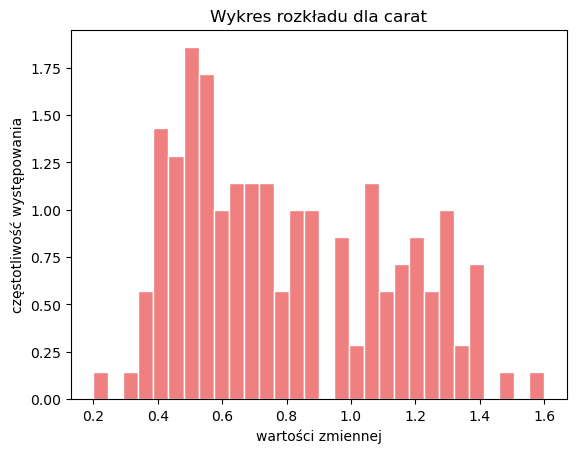

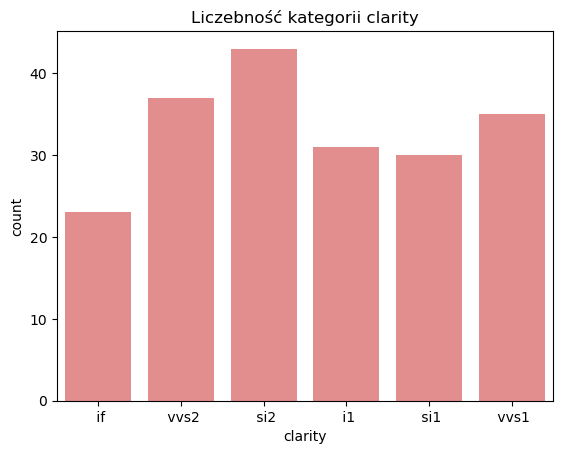

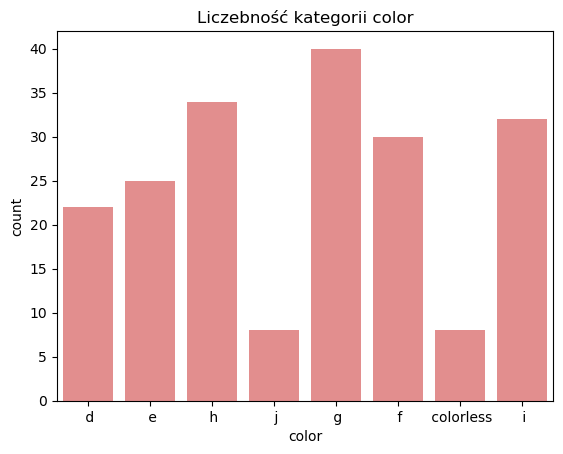

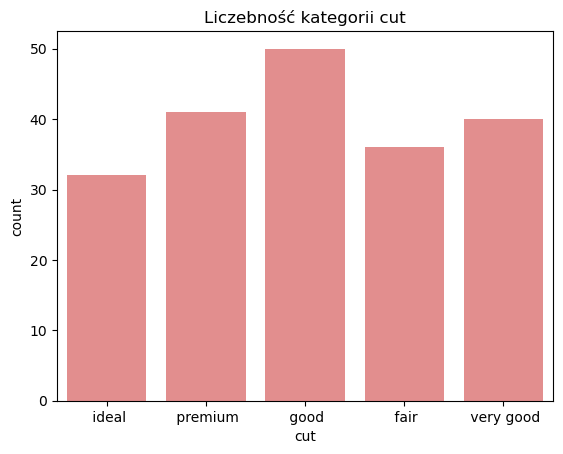

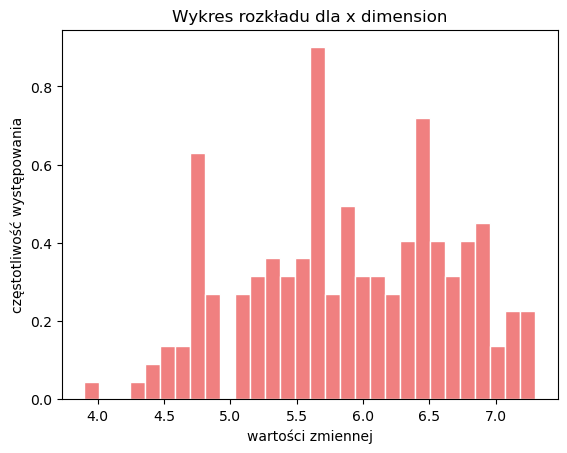

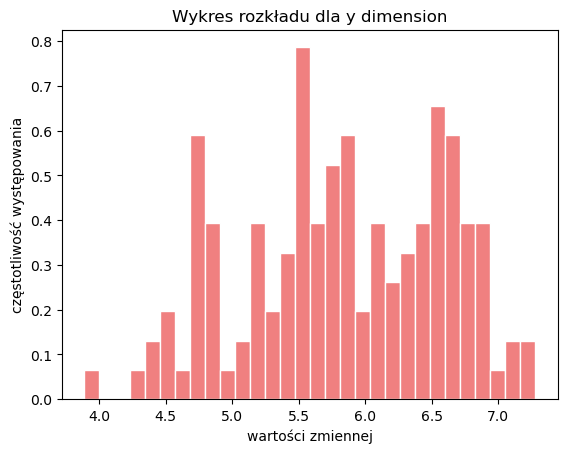

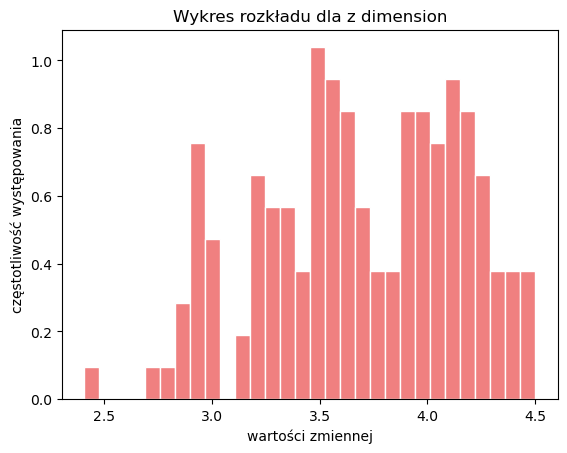

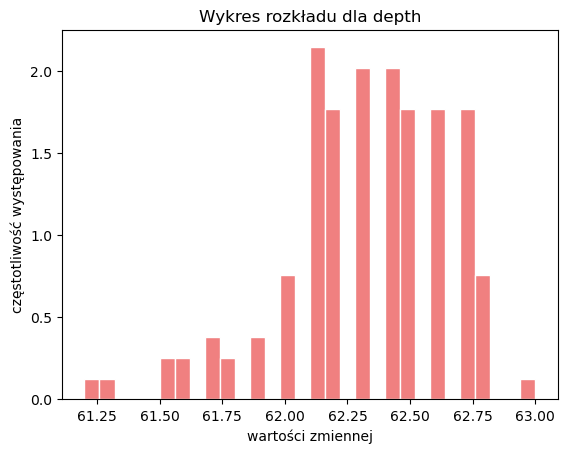

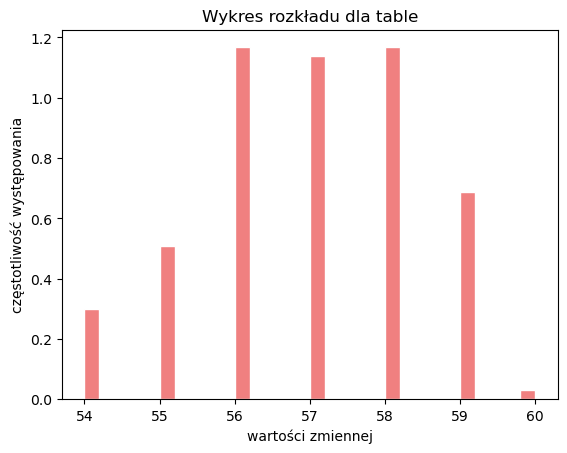

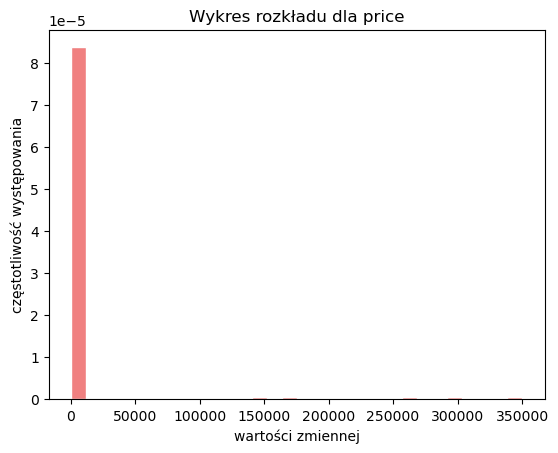

In [516]:
for zmienna in data.columns:
    if zmienna in ['clarity', 'color', 'cut']:
        sns.countplot(x=data[zmienna], color='lightcoral')
        plt.title(f'Liczebność kategorii {zmienna}')
        plt.show()
    else:
        plt.hist(data[zmienna], bins=30, edgecolor='white', color = 'lightcoral', density=True)
        plt.title(f'Wykres rozkładu dla {zmienna}')
        plt.xlabel('wartości zmiennej')
        plt.ylabel('częstotliwość występowania')
        plt.show()

## Outliersy

In [517]:
#wyłapywanie outliersów przez IQR

IQR  = data['price'].quantile(0.75) - data['price'].quantile(0.25)
rule = data['price'].quantile(0.75) + 1.5 * IQR

data[(data['price'] > rule)]

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
182,NaN,i1,g,ideal,5.2,5.24,3.23,NaN,57.0,170000.0
184,1.40,si2,d,very good,7.3,NaN,4.50,62.6,59.0,350000.0
187,0.90,if,g,very good,6.3,NaN,3.90,NaN,57.0,260000.0
189,NaN,vvs2,d,fair,6.7,NaN,4.14,62.2,59.0,300000.0
197,0.55,i1,i,premium,5.3,NaN,3.28,62.3,57.0,150000.0


In [518]:
data

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,if,d,ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.70,vvs2,e,premium,5.7,NaN,3.52,62.0,59.0,4500.0
2,NaN,si2,h,good,4.3,4.31,NaN,62.3,56.0,700.0
3,1.20,if,d,ideal,NaN,6.82,4.20,61.7,58.0,10000.0
4,0.90,i1,j,fair,6.0,NaN,3.70,61.7,NaN,2400.0
...,...,...,...,...,...,...,...,...,...,...
195,0.45,si1,f,very good,4.9,4.89,NaN,62.4,59.0,2300.0
196,1.25,vvs2,h,good,6.9,NaN,4.27,NaN,55.0,10400.0
197,0.55,i1,i,premium,5.3,NaN,3.28,62.3,57.0,150000.0
198,0.85,si2,e,fair,6.1,6.13,3.78,NaN,58.0,6300.0


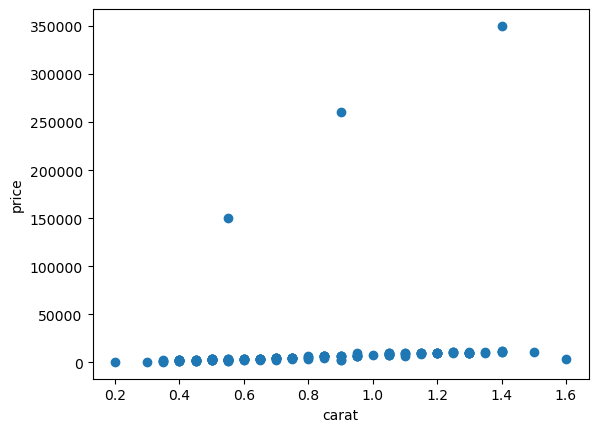

In [519]:
plt.scatter(data['carat'], data['price'])
plt.xlabel('carat')
plt.ylabel('price')

plt.show()

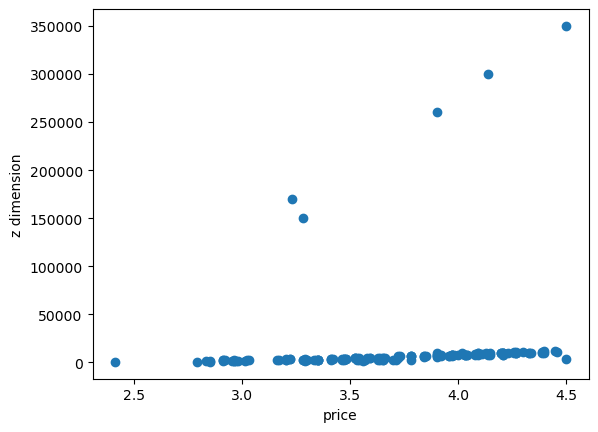

In [520]:
plt.scatter(data['z dimension'], data['price'])
plt.xlabel('price')
plt.ylabel('z dimension')

plt.show()

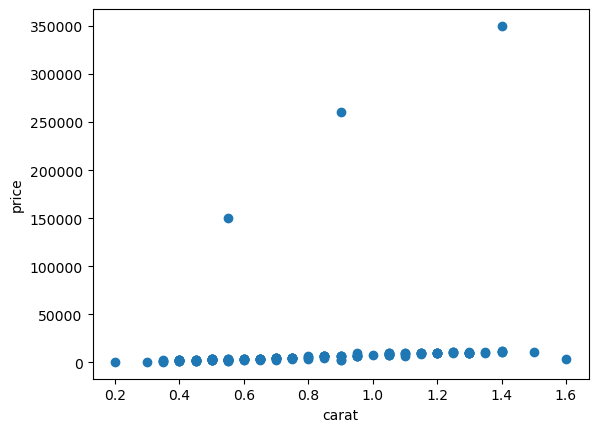

In [521]:
plt.scatter(data['carat'], data['price'])
plt.xlabel('carat')
plt.ylabel('price')

plt.show()

In [522]:
data = data[~(data['price'] > rule)]
data


,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,if,d,ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.70,vvs2,e,premium,5.7,NaN,3.52,62.0,59.0,4500.0
2,NaN,si2,h,good,4.3,4.31,NaN,62.3,56.0,700.0
3,1.20,if,d,ideal,NaN,6.82,4.20,61.7,58.0,10000.0
4,0.90,i1,j,fair,6.0,NaN,3.70,61.7,NaN,2400.0
...,...,...,...,...,...,...,...,...,...,...
194,0.95,si1,g,ideal,6.4,6.42,3.96,NaN,56.0,7100.0
195,0.45,si1,f,very good,4.9,4.89,NaN,62.4,59.0,2300.0
196,1.25,vvs2,h,good,6.9,NaN,4.27,NaN,55.0,10400.0
198,0.85,si2,e,fair,6.1,6.13,3.78,NaN,58.0,6300.0


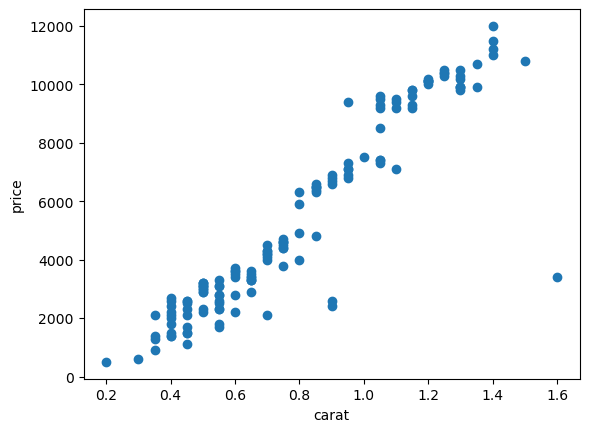

In [523]:
plt.scatter(data['carat'], data['price'])
plt.xlabel('carat')
plt.ylabel('price')

plt.show()

In [524]:
data = data.drop(data[data['carat'] == 1.6].index)

In [525]:
data[data['carat'] == 0.9]

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
4,0.9,i1,j,fair,6.0,NaN,3.70,61.7,NaN,2400.0
32,0.9,si2,h,fair,6.1,6.12,3.78,62.4,NaN,2600.0
70,0.9,si1,colorless,premium,6.2,6.22,NaN,62.3,59.0,6600.0
84,0.9,si1,i,very good,6.2,NaN,3.85,62.2,59.0,6700.0
120,0.9,si2,h,premium,6.2,6.21,3.84,NaN,59.0,6800.0
166,0.9,si2,g,premium,6.3,6.31,3.90,NaN,58.0,6900.0


In [526]:
data = data.drop(data.index[[4,30]])

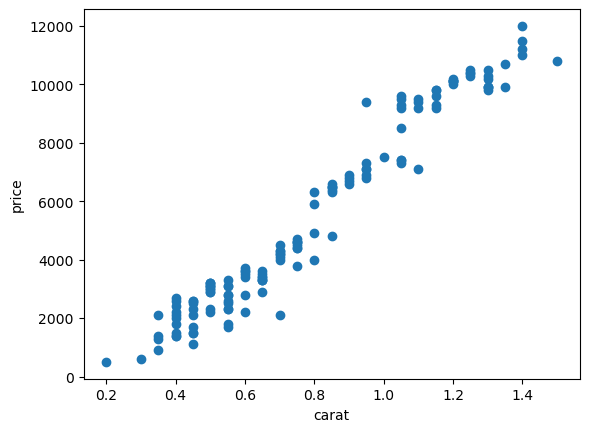

In [527]:
plt.scatter(data['carat'], data['price'])
plt.xlabel('carat')
plt.ylabel('price')

plt.show()

In [528]:
numeric.append('carat')

In [529]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data[numeric] = np.round(imputer.fit_transform(data[numeric]), 2)

In [530]:
data.isna().sum()

carat          0
clarity        0
color          0
cut            0
x dimension    0
y dimension    0
z dimension    0
depth          0
table          0
price          0
dtype: int64

In [531]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        191 non-null    float64
 1   clarity      191 non-null    string 
 2   color        191 non-null    string 
 3   cut          191 non-null    string 
 4   x dimension  191 non-null    float64
 5   y dimension  191 non-null    float64
 6   z dimension  191 non-null    float64
 7   depth        191 non-null    float64
 8   table        191 non-null    float64
 9   price        191 non-null    float64
dtypes: float64(7), string(3)
memory usage: 16.4 KB


In [532]:
data.to_csv('dane_wyczyszczone.csv', index = False)